In [12]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Causality

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [13]:
bta = Table.read_table('bta.csv')
bta.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [14]:
bta.group('Group')

Group,count
Control,16
Treatment,15


In [15]:
bta.group('Group', sum)

Group,Result sum
Control,2
Treatment,9


In [16]:
bta.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [17]:
observed_outcomes = Table.read_table('observed_outcomes.csv')
observed_outcomes.show()

Group,Outcome if assigned treatment,Outcome if assigned control
Control,Unknown,1
Control,Unknown,1
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0


In [18]:
bta 

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [19]:
obs_proportions = bta.group('Group', np.average).column(1)
obs_proportions

array([0.125, 0.6  ])

In [20]:
observed_distance = abs(obs_proportions.item(0) - obs_proportions.item(1))
observed_distance

0.475

In [21]:
bta

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [22]:
labels = bta.select('Group')
results = bta.select('Result')

In [23]:
shuffled_results = results.sample(with_replacement=False).column(0)
shuffled_tbl = labels.with_column('Shuffled Result', shuffled_results)
proportions = shuffled_tbl.group('Group', np.average).column(1)
new_distance = abs(proportions.item(0) - proportions.item(1))
new_distance

0.21666666666666667

In [24]:
distances = make_array()

for i in np.arange(20000):
    shuffled_results = results.sample(with_replacement=False).column(0)
    shuffled_tbl = labels.with_column('Shuffled Result', shuffled_results)
    proportions = shuffled_tbl.group('Group', np.average).column(1)
    new_distance = abs(proportions.item(0) - proportions.item(1))
    distances = np.append(distances, new_distance)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


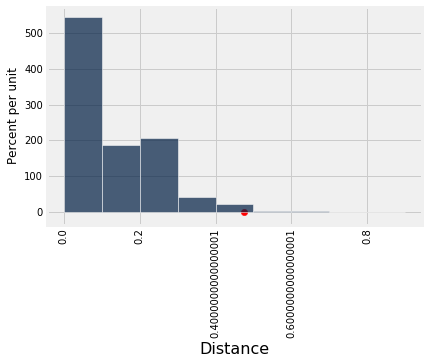

In [25]:
Table().with_column('Distance', distances).hist(bins=np.arange(0, 1, 0.1), ec='w')
plots.scatter(observed_distance, 0, color='red', s=40);

In [26]:
np.count_nonzero(distances >= observed_distance) / 20000

0.0088